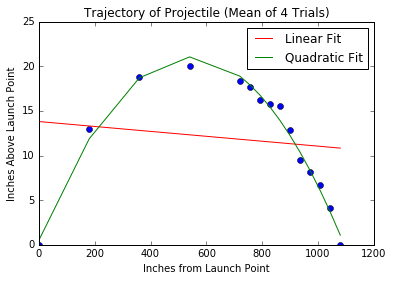

In [1]:
# Create a fuction that describe the trajectory of an arrow 
# from the bow to the target

%matplotlib inline
import pylab, random

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def tryFits(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit')
    pylab.legend()

tryFits('launcherData.txt')
pylab.show()

## Unvariability of the data (variability of the errors)

$\sigma_{err}^2 = ln\sum (obs_i - pred_i)^2$

## Variability of the data

$\sigma_{data}^2 = ln\sum (obs_i - mean_{obj})^2$

## $R^2$: Coefficient of Determination

Fraction of variability NOT explained by the model

$\frac{\sigma_{err}^2}{\sigma_{data}^2}$

Fraction of variability explained by the model

$R^2 = 1- \frac{\sigma_{err}^2}{\sigma_{data}^2}$


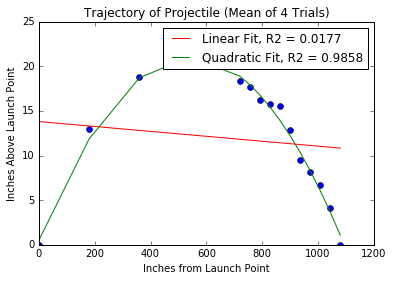

In [2]:
# Measure the coefficient of determination
def rSquare(measured, estimated):
    """measured: one dimensional array of measured values
       estimate: one dimensional array of predicted values"""
    SEE = ((estimated - measured)**2).sum()
    mMean = measured.sum()/float(len(measured))
    MV = ((mMean - measured)**2).sum()
    return 1 - SEE/MV

def tryFits1(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    pylab.legend()

tryFits1('launcherData.txt')
pylab.show()